In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys 
import os
from os import path
root_path = os.path.dirname(os.getcwd())
sys.path.insert(0, root_path)

In [3]:
import pandas as pd
from src.misc.project_figure_analysis import normalize_dataset

In [4]:
folder_type = "discrete"
dataset = "make_circles_3"
filename= "bins10_epochs200_arch5_lr0.15_samplepct1.csv"
root_path = path.dirname(os.getcwd())
filepath = path.join(root_path, "results", folder_type, dataset, filename)

In [5]:
df = pd.read_csv(filepath,sep=";")

In [41]:
aux = normalize_dataset(df).groupby(["epoch", "layer"], as_index=False).mean()

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

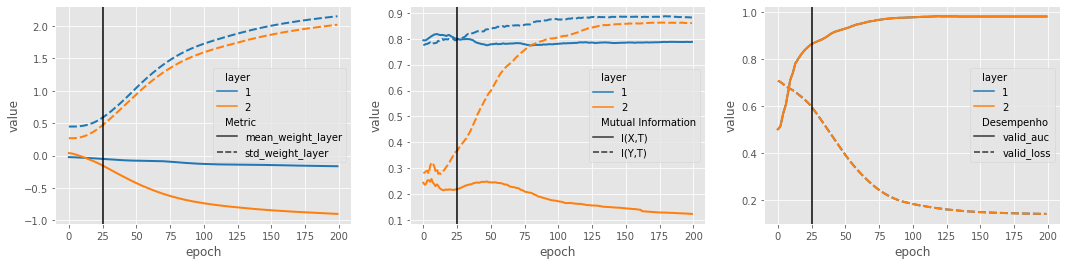

In [57]:
fig, axs = plt.subplots(1,3,figsize=(18,4))

vars_names = ["Metric", "Mutual Information", "Desempenho"]
values_vars = [("mean_weight_layer", "std_weight_layer"), ("I(X,T)", "I(Y,T)"), ("valid_auc", "valid_loss")]
horizontal_line_position = 25

for var_name, value_vars, ax in zip(vars_names, values_vars, axs.flatten()):


    test = aux.melt(id_vars=["epoch", "layer"],
                    value_vars=value_vars,
                    var_name=var_name)


    sns.lineplot(data=test, x="epoch", y="value", hue="layer", style=var_name, palette="tab10", linewidth=2, ax=ax)
    ax.axvline(x=horizontal_line_position, color= "black")

plt.show()